## Step-by-Step Tutorial: Classifying MNIST Dataset with TensorFlow and Keras

### Step 1: Importing Necessary Libraries
Before working with the MNIST dataset, we need to import essential libraries:

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

- tensorflow and keras for building the neural network.
- matplotlib.pyplot for visualizing data.
- numpy for handling arrays.


### Step 2: Loading the MNIST Dataset
The dataset is available in TensorFlow's keras.datasets module and can be loaded as follows:

In [24]:
(X_train, Y_train),(X_test, Y_test) = keras.datasets.mnist.load_data()

- X_train, Y_train: Training images and labels.
- X_test, Y_test: Testing images and labels.

### Step 3: Exploring the Data
Before training the model, it's good to inspect the dataset:

In [25]:
print("Number of training samples:", len(X_train))
print("Number of testing samples:", len(X_test))
print("Shape of an image:", X_train[0].shape)

Number of training samples: 60000
Number of testing samples: 10000
Shape of an image: (28, 28)


Visualizing the data can be done by using the pyplot function

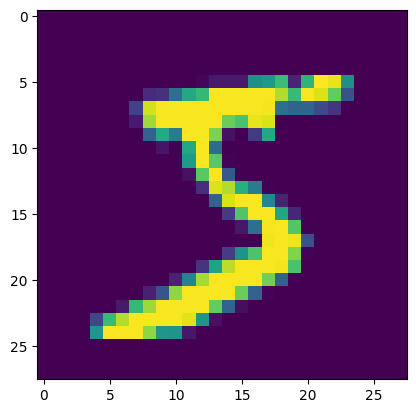

In [26]:
plt.imshow(X_train[0])

### Step 4: Preprocessing the Data
Neural networks work better when pixel values are normalized between 0 and 1:

In [27]:
X_train = X_train / 255
X_test = X_test / 255

This scales the pixel values from their original range (0-255) to (0-1).

### Step 5: Building the Model
We'll use a simple feedforward neural network:

In [28]:
model = Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(Dense(500, activation = 'relu'))
model.add(Dense(500, activation = 'relu'))
model.add(Dense(10, activation = 'sigmoid'))

- Flatten: Converts 2D images into a 1D array.
- Dense(500, activation='relu'): A fully connected hidden layer with ReLU activation.
- Dense(10, activation='sigmoid'): The output layer with 10 units (one per digit), using the sigmoid function for classification.

### Step 6: Compiling the Model
Before training, we need to configure the model:

In [31]:
model.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy', 
    metrics = ['accuracy'])

- optimizer='adam': Adaptive moment estimation for optimizing weights.
- loss='sparse_categorical_crossentropy': Suitable for multi-class classification.
- metrics=['accuracy']: To track accuracy.

### Step 7: Training the Model
We train the model using the fit function:

In [32]:
model.fit(X_train, Y_train, epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9068 - loss: 0.3074
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9747 - loss: 0.0795
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9825 - loss: 0.0538
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9873 - loss: 0.0372
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9886 - loss: 0.0350


- epochs=5: Runs the training for 5 cycles.

In [33]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 500)            │       392,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,944,032 (7.42 MB)

 Trainable params: 648,010 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,296,022 (4.94 MB)

### Evaluate the Model

In [35]:
model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9751 - loss: 0.0979


[0.08113542199134827, 0.9779999852180481]

### Make Predictions

[[0. 0. 0. ... 1. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


<function matplotlib.pyplot.show(close=None, block=None)>

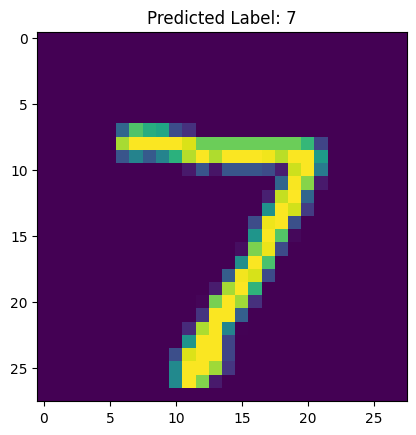

In [42]:
predictions = model.predict(X_test, batch_size = 32, verbose = 0)
print(np.round(predictions))

predicted_label = np.argmax(predictions[0])
plt.imshow(X_test[0])
plt.title(f'Predicted Label: {predicted_label}')
plt.show

### Testing
New Model

In [52]:
from tensorflow.keras.layers import Conv2D, Flatten, MaxPool2D
model2 = Sequential()
model2.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28, 1)))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Conv2D(64, (3,3), activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(10, activation='softmax'))

model2.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
model2.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])
model2.fit(X_train, Y_train, epochs=7)

Epoch 1/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.9189 - loss: 0.2699
Epoch 2/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9868 - loss: 0.0424
Epoch 3/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9915 - loss: 0.0285
Epoch 4/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9933 - loss: 0.0200
Epoch 5/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.9964 - loss: 0.0130
Epoch 6/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9971 - loss: 0.0103
Epoch 7/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9969 - loss: 0.0086


In [54]:
model2.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9852 - loss: 0.0485


[0.04078642278909683, 0.9884999990463257]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


2

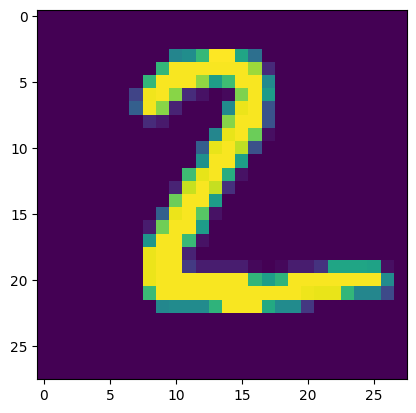

In [56]:
plt.imshow(X_test[1])
Y_test[1]

X_test_reshaped = X_test.reshape(len(X_test), 28, 28)
y_predicted = model2.predict(X_test_reshaped)
np.argmax(y_predicted[1])

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


<function matplotlib.pyplot.show(close=None, block=None)>

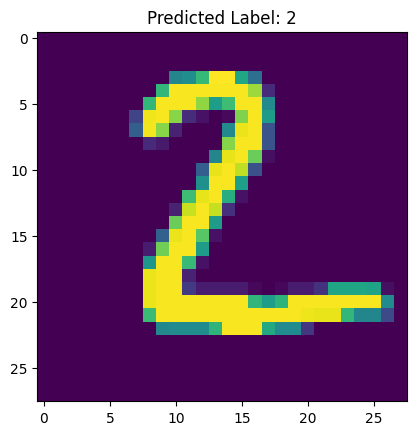

In [58]:
predictions2 = model2.predict(X_test, batch_size = 32, verbose = 0)
print(np.round(predictions2))

predicted_label2 = np.argmax(predictions2[1])
plt.imshow(X_test[1])
plt.title(f'Predicted Label: {predicted_label2}')
plt.show